# BoomBikes Sharing Assisgnment (Linear Regression)

# **Problem statement-**
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.**BoomBikes** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.They want to know the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.
The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Section 1 :- Importing the required Libraries

In [1]:
# For Dataset and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Importing the warnings library to ignore the warning pop up message.
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing the sklearn library to perform the machine learning concept
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

In [4]:
# importing the statmodel library 
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Section 2 :- Loading and Understanding the data

#### Section 2.1 :- Loading Dataset

In [5]:
data = pd.read_csv("BoomBikes_data.csv")

In [6]:
# Creating the copy of original dataset to work on it.
boombikes_data = data.copy()

In [7]:
# Checking the head and tail view of the dataset
boombikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
boombikes_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


#### Section 2.2 :- Basic Observation and Data Understanding

In [9]:
# checking the dimension of the dataset.
print(f"Given dataset contains {boombikes_data.shape[0]} rows and {boombikes_data.shape[1]} columns.")

Given dataset contains 730 rows and 16 columns.


In [10]:
# checking the basic information about the dataset
boombikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Only 'dteday' columns has a object as datatype rest all columns have int or float data type. 

In [11]:
# checking for the null values 
boombikes_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values and missing values present in boombikes_data.

In [12]:
boombikes_data.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [13]:
# checking for the duplicate values 
boombikes_data[boombikes_data.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


There is no duplicate values present in dataset.

## Data Cleaning 

### Dropping the unwanted columns from the dataset

dropping unecessary features

- drop instant column -- it is just index, so no use
- drop dteday column -- the information is already expressed by yr,mnth,weekday,workingday columns so no use for modelling 
- drop casual and registered -- the dependent variable or target variable is cnt, which is nonthing but addition of these two columns only, so  it will be redundunt to keep these two columns (no analysis is required on this basis of casual/registered)

In [14]:
boombikes_data.drop(columns=['instant','dteday','casual','registered'],inplace=True)

In [15]:
boombikes_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


### Transforming the data  

#### (1) Season column

In [16]:
# checking the unique values 
boombikes_data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

There are four unique seasons in dataset.

In [17]:
# transforming season feature :
boombikes_data['season'] = boombikes_data['season'].map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})


#### (2) mnth column

In [18]:
# checking the unique values
boombikes_data['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

There are 12 unique months present in the mnth column

In [19]:
# Transforming mnth feature:
boombikes_data['mnth'] = boombikes_data['mnth'].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:'May',6:"Jun",7:'Jul',8:"Aug",9:'Sep',10:"Oct",11:"Nov",12:"Dec"})

#### (3) Weekday column

In [20]:
#checking the unique values
boombikes_data['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

There are 7 unique weekdays in dataset.

In [21]:
#Transforming weekday feature:
boombikes_data['weekday'] = boombikes_data['weekday'].map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})

#### (4) Weathersit column

In [22]:
# checking the unique values
boombikes_data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

There are only 3 unique weather situations in dataset.

In [23]:
# Transforming weathersit feature:
boombikes_data['weathersit'] = boombikes_data['weathersit'].map({1:"Clear to Partly Cloudy",2:"Misty and Cloudy",3:"Light Rain or Snow"})

In [24]:
# Rechecking the dataset after tranfdorming it.
boombikes_data.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,801


## Section 3: Exploratory Data Analysis

### Section 3.1 : Univariate Analysis

### Section 3.1.1 Target Variable

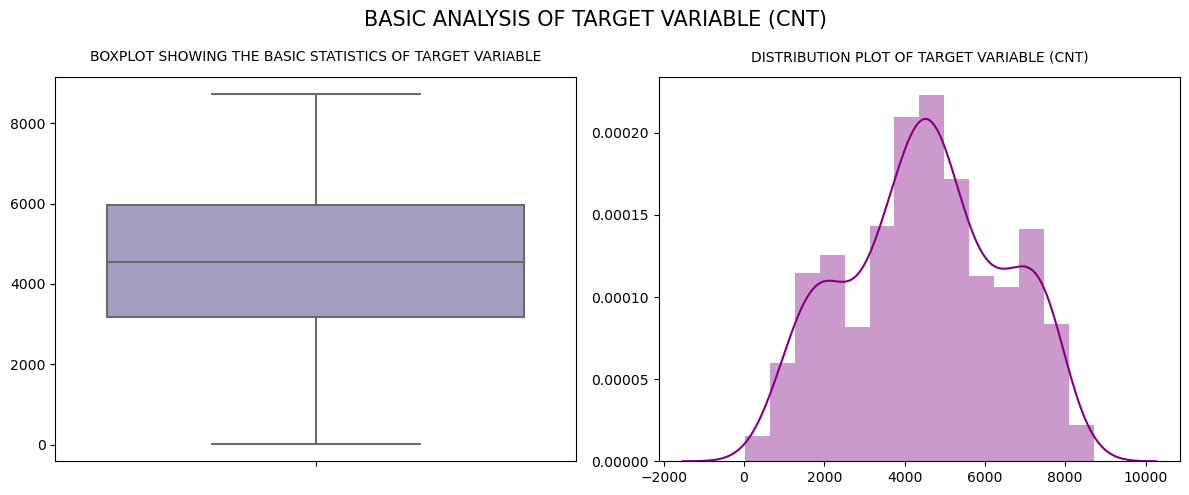

In [25]:
# Creating the subplot grid:
fig, ax= plt.subplots(nrows=1 , ncols=2,figsize=(12,5))

# Creating the title
fig.suptitle("Basic analysis of target variable (cnt)".upper(),fontsize= 15)

# Plotting the graph1:
sb.boxplot(y=boombikes_data['cnt'],ax= ax[0],palette= "Purples")
ax[0].set_title('boxplot showing the basic statistics of target variable'.upper(),
               fontsize= 10,fontweight= 20,y= 1.02)
ax[0].set_ylabel('')
ax[0].set_xlabel('')

# plotting graph 2:
sb.distplot(boombikes_data['cnt'],ax=ax[1],color="purple")
ax[1].set_title("distribution plot of target variable (cnt)".upper(),
               fontsize=10,fontweight=20,y=1.02)
ax[1].set_ylabel('')
ax[1].set_xlabel('')

# Setting layout
plt.tight_layout()
plt.show()

Inferences :

    (1).Target variable shows an almost normal distribution of values with 2 distinct plateaus on eitheir side.
    
    (2).Q1 of target variable lies at around 3000 and Q3 at around 6000.IQR thus is approximately 3000 with median at around             4500 value.

### Section 3.1.2: Continuous Independent Variables

In [26]:
# creating the list of independent variables for analysis
con_var= [i for i in boombikes_data.select_dtypes(exclude='object').columns if boombikes_data[i].nunique() > 2 and i!='cnt']

In [27]:
con_var

['temp', 'atemp', 'hum', 'windspeed']

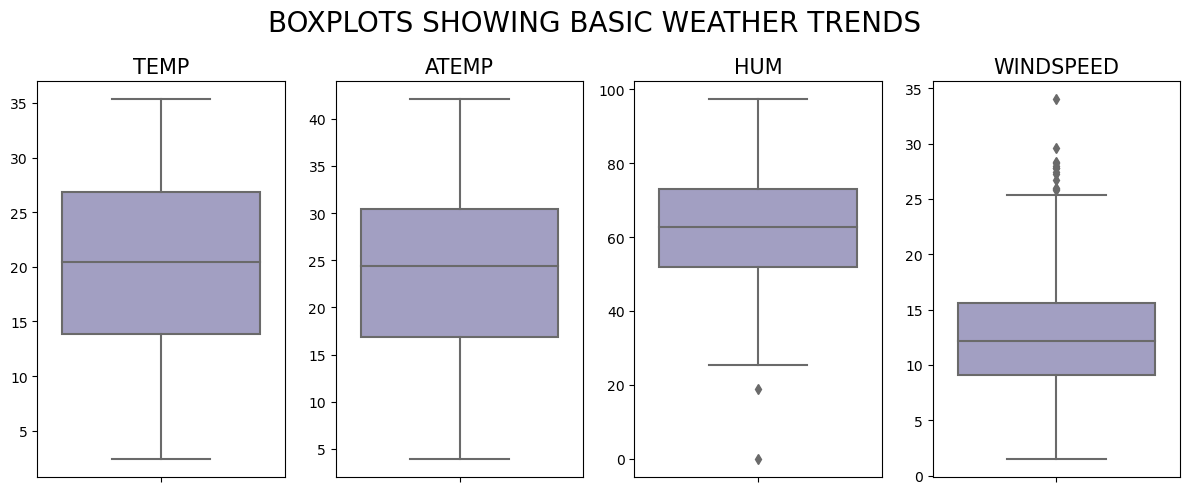

In [28]:
# creating the subplot grid:
fig, ax= plt.subplots(nrows=1,ncols=len(con_var),figsize=(12,5))

# creating the title
plt.suptitle('boxplots showing basic weather trends'.upper(),fontsize=20)

# looping to fill subplot grid with plots
for i in range(len(con_var)):
    sb.boxplot(y=boombikes_data[con_var[i]],ax=ax[i],palette="Purples")
    
    # setting title for con_var
    ax[i].set_title(f"{con_var[i].upper()}",fontsize=15)
    ax[i].set_ylabel('')
    
# setting layout
plt.tight_layout()
plt.show()

Inference:
    
    (1). Q1 and Q3 of temp is distributed between 14 and 27 with median as 21.
    (2). Q1 and Q3 of atemp is distributed between 17 and 31 with median as 24.
    (3). temp and atemp appear to be almost normally distributed as they have no outliers present in it.
    (4). humidity and windspeed have shown presence of outliers in it.

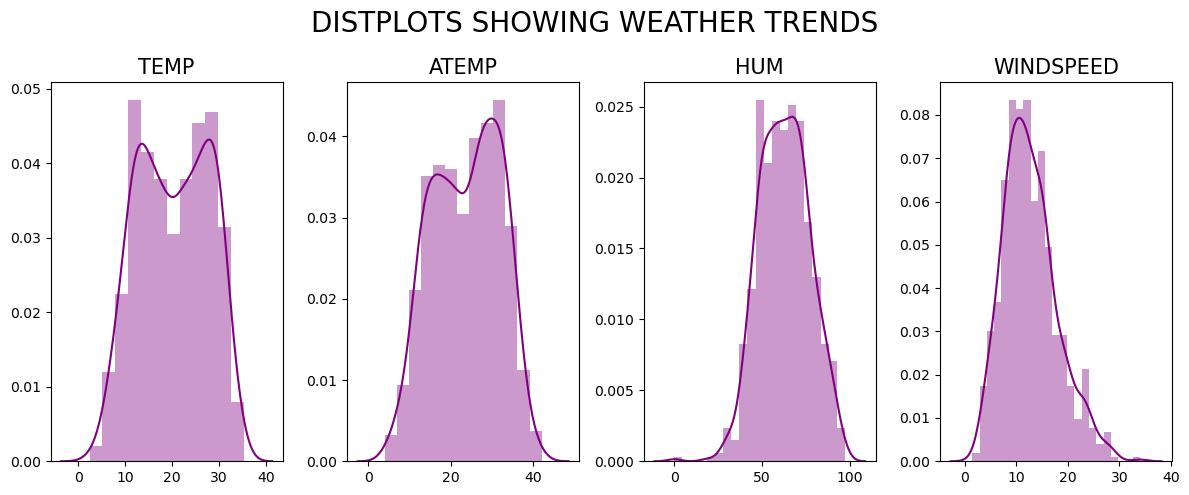

In [29]:
# creating the subplot grid:
fig, ax= plt.subplots(nrows=1,ncols=len(con_var),figsize=(12,5))

# creating the title
plt.suptitle('distplots showing weather trends'.upper(),fontsize=20)

# looping to fill subplot grid with plots
for i in range(len(con_var)):
    sb.distplot(boombikes_data[con_var[i]],ax=ax[i],color="purple")
    
    # setting title for con_var
    ax[i].set_title(f"{con_var[i].upper()}",fontsize=15)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    
# setting layout
plt.tight_layout()
plt.show()

Inference:
    
    (1).The distplot shows that our initial understanding of the variables was incorrect, as both temp and atemp have two 
        peaks.
    
    (2).Humidity and Windspeed are left and right skewed respectively.

### Section 3.1.3: Cactegorical Independent Variables

In [30]:
# creating a list of categorical independent variables for analysis
cat_var= [i for i in boombikes_data.select_dtypes(include='object').columns]

cat_var.extend([i for i in boombikes_data.columns if boombikes_data[i].nunique()==2])

In [31]:
cat_var

['season', 'mnth', 'weekday', 'weathersit', 'yr', 'holiday', 'workingday']

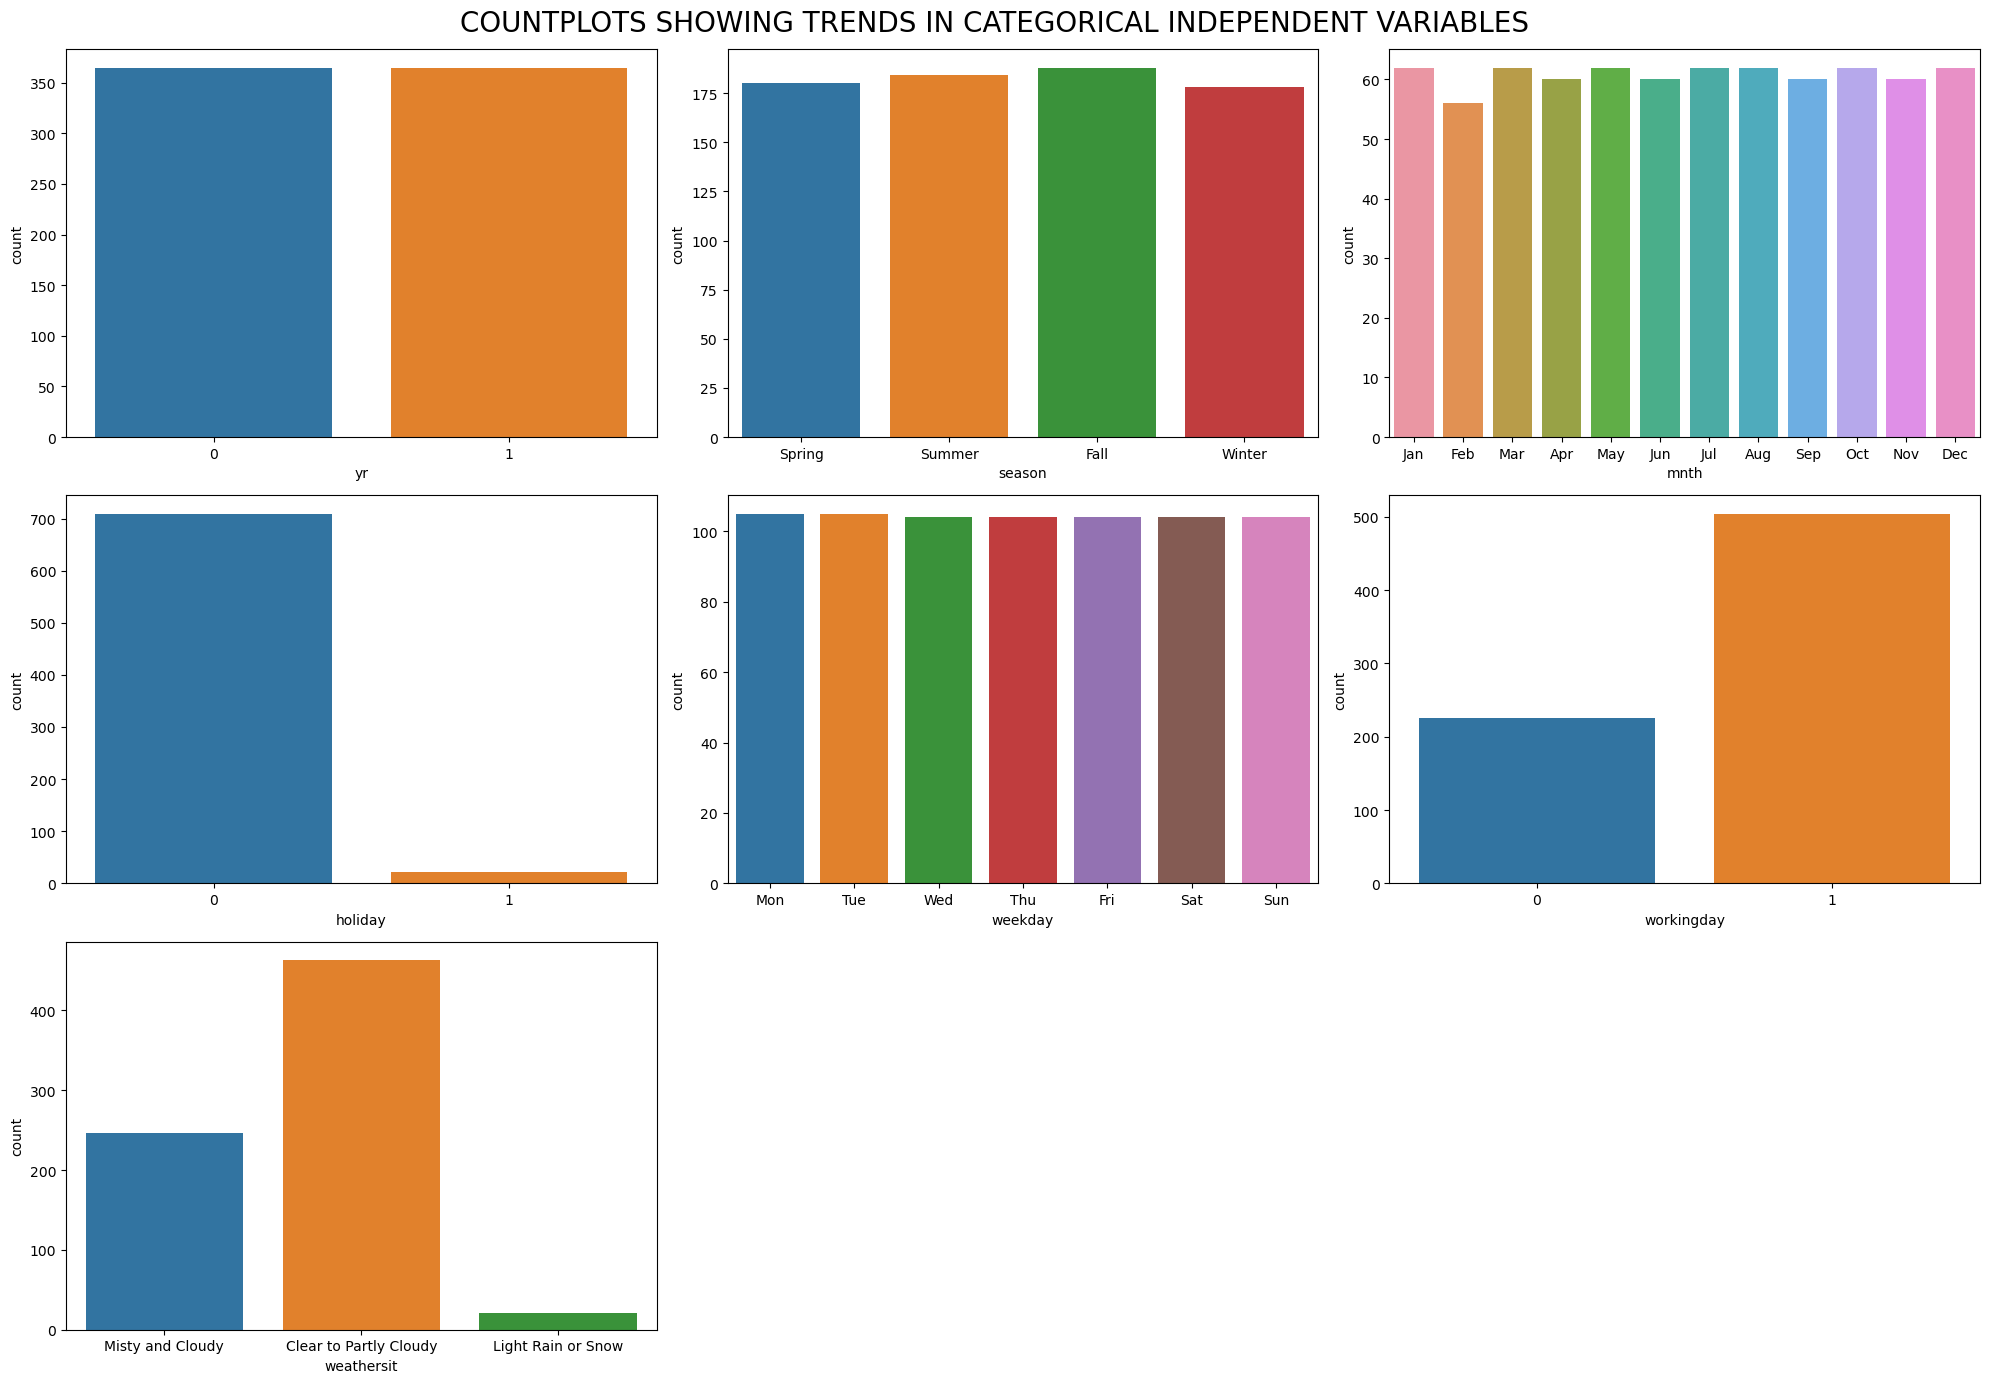

In [32]:
# layout size
plt.figure(figsize=(20,18))

# Creating the main title
plt.suptitle("countplots showing trends in categorical independent variables".upper(),fontsize= 20,fontweight= 20,y=0.99)

# plotting the categorical independent feature
plt.subplot(4,3,1)
sb.countplot(data= boombikes_data,x='yr'),

plt.subplot(4,3,2)
sb.countplot(data= boombikes_data,x='season'),

plt.subplot(4,3,3)
sb.countplot(data= boombikes_data,x='mnth'),

plt.subplot(4,3,4)
sb.countplot(data= boombikes_data,x='holiday'),

plt.subplot(4,3,5)
sb.countplot(data= boombikes_data,x='weekday'),

plt.subplot(4,3,6)
sb.countplot(data= boombikes_data,x='workingday'),

plt.subplot(4,3,7)
sb.countplot(data= boombikes_data,x='weathersit'),


# Setting layout
plt.tight_layout()
plt.show() 


## Section 3.2: Bivariate Analysis

### Section 3.2.1: Continuous Independent Variable

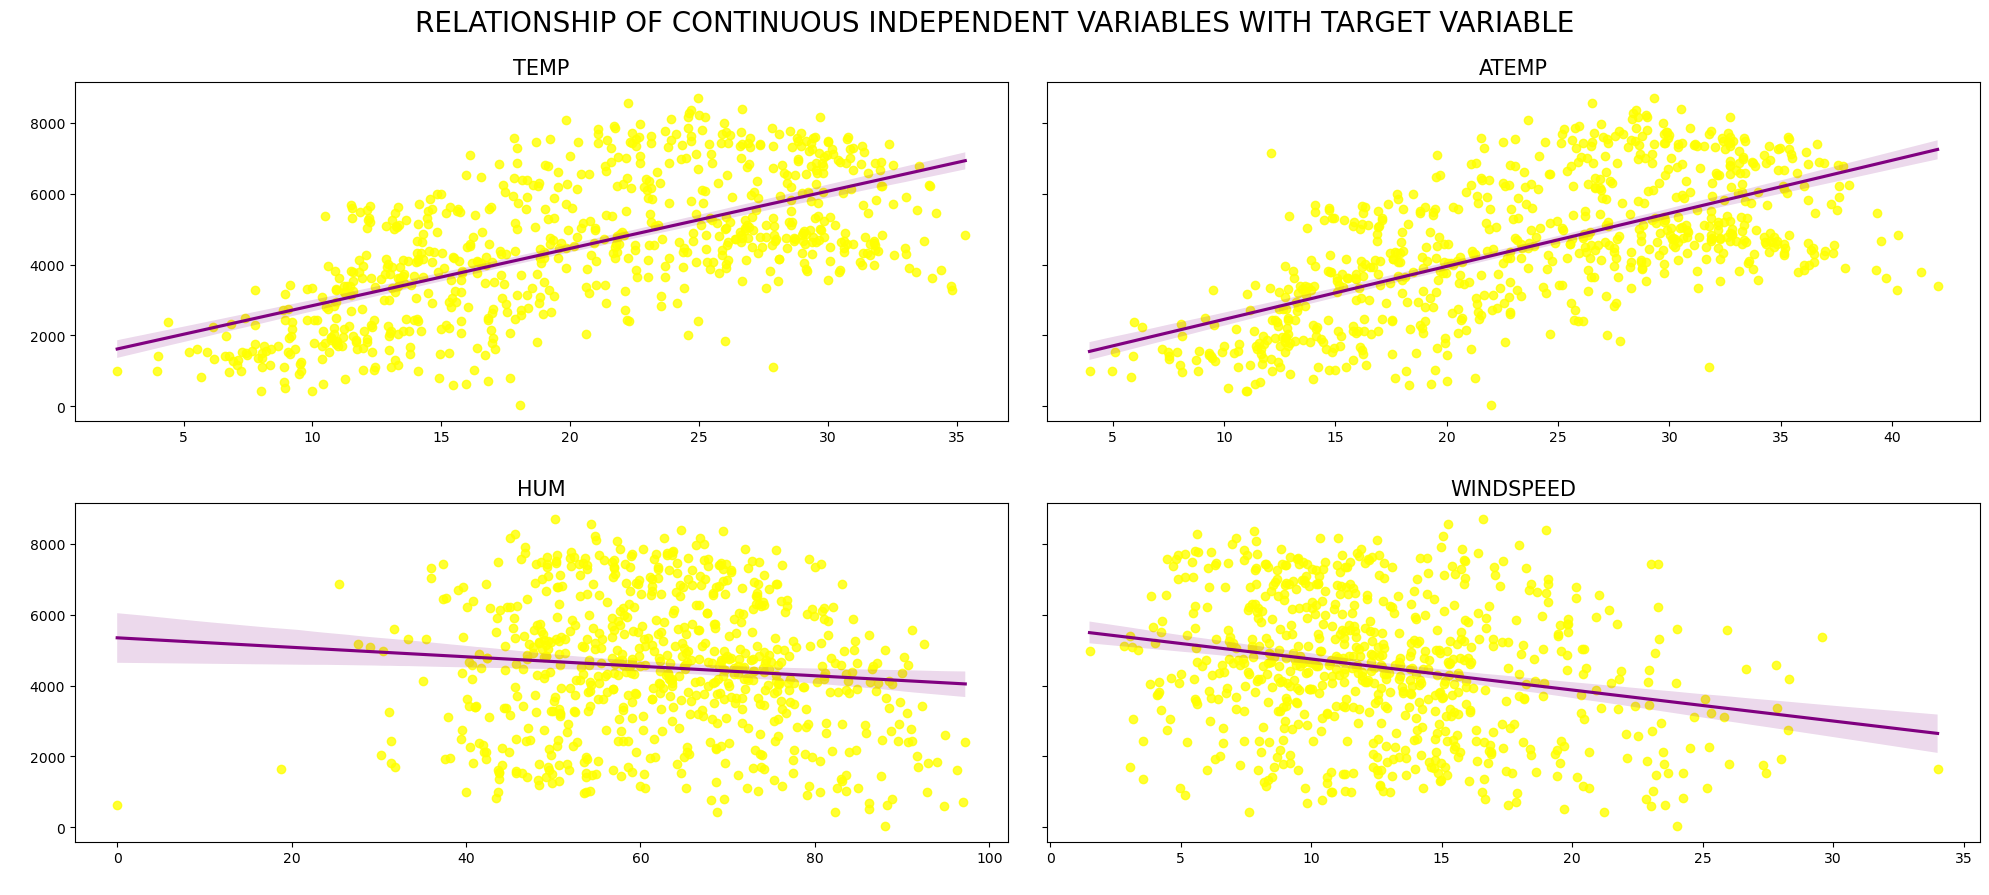

In [33]:
# Creating a subplot grid
fig, ax=plt.subplots(nrows= 2, ncols=int(len(con_var)/2),figsize=(20,9), sharey= True)

# Creatiing the main title
plt.suptitle("relationship of continuous independent variables with target variable".upper(),fontsize= 20,fontweight= 20,y= 0.99)

# lopping to fill subplot grid with plots
k=0
for i in range(2):
    for j in range(int(len(con_var)/2)):
        sb.regplot(x= boombikes_data[con_var[k]], y= boombikes_data['cnt'],ax= ax[i, j],
                  scatter_kws={'color':'yellow'},line_kws= {'color':"purple"})
        
        # Setting title for cat_var
        ax[i,j].set_title(f'{con_var[k].upper()}',fontsize= 15)
        ax[i,j].set_xlabel(' ')
        ax[i,j].set_ylabel(' ')
        
        k+=1
        
# Setting layout
plt.tight_layout()
plt.show() 

Inference :
    
    (1) We observed that as temperature is increasing the bike demands also increasing proportional.
    
    (2) Similarly  for atemp as it is increases the bike demands also increases proportional.
    
    (3) We also observed that when Humidity and windspeed increases the bike demand decreases.
    

### Section3.2.2: Monthwise variation in weathersit

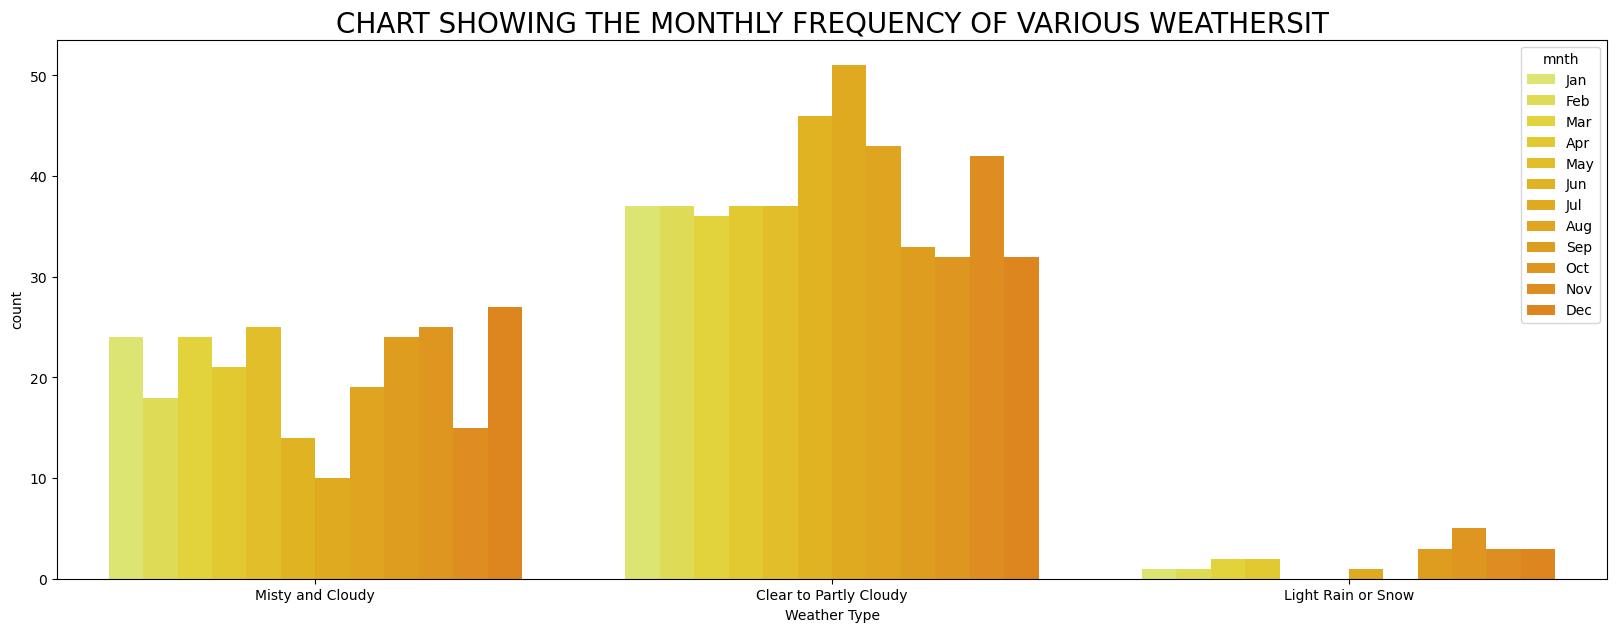

In [34]:
# plot figure size
plt.figure(figsize=(20,7))

# plotting the graph
sb.countplot(x='weathersit',data=boombikes_data, hue= 'mnth', palette= "Wistia")

# plot title
plt.title('chart showing the monthly frequency of various weathersit'.upper(),fontsize= 20)
plt.xlabel('weather type'.title())

plt.show()

Inference:
    
    (1) Overall, maximum number of days have been "Clear to Partly Cloudy" followed by "Misty and Cloudy".
    
    (2) July has shown the maximum occurance of clear to partly cloudy days folllowed by June and  then August.
    
    (3) Maximum number of musty occurance have been seen in the month of December followed by Jan,March,May and October.

## Section 3.3: Intervariable Relationship

### Section 3.3.1: Using Pairplot

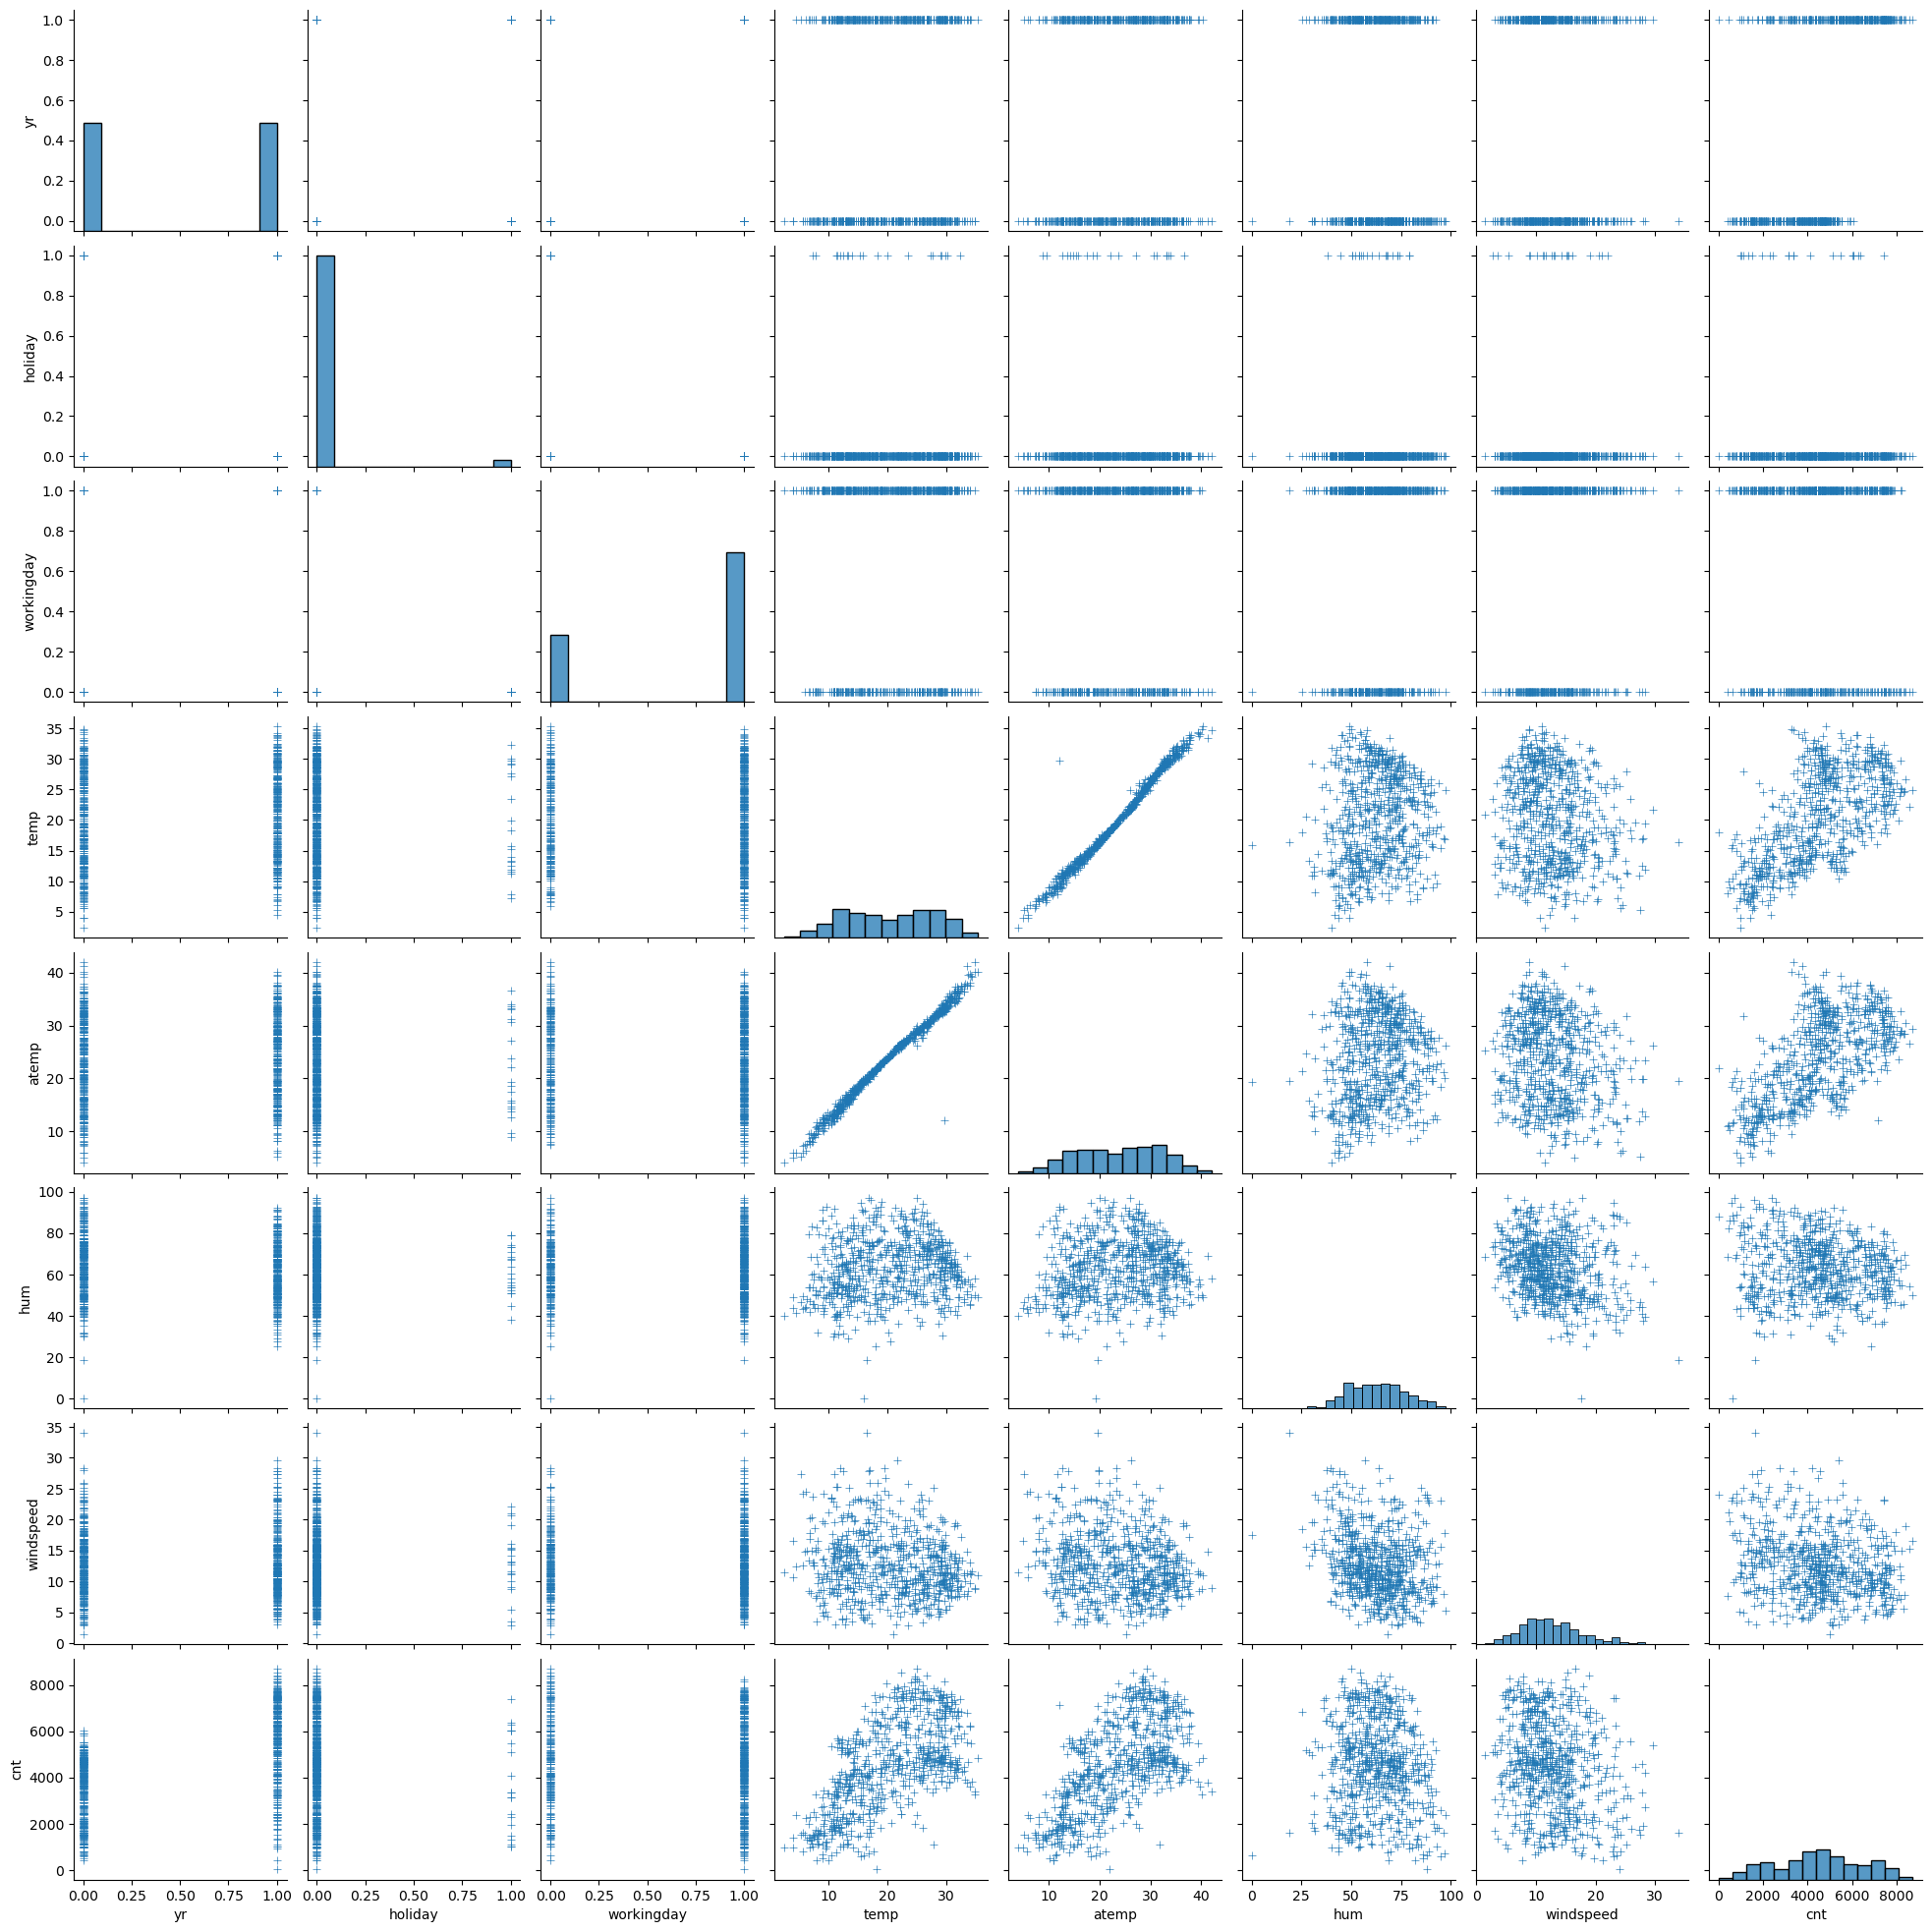

In [35]:
sb.pairplot(boombikes_data, markers='+', palette= "Purples")
plt.show()

Inference:
    
    (*) Target Variable:
        
        (1). cnt is directly proportional with temp and atemp.
        
        (2). cnt is inversely proportional with humidity snd windspeed.
        
        
    (*) Independent Variables:
        
        (1). windspeed is inversely proportional with humidity,temp and atemp.
        
        (2). humidity is directly proportional with temp , atemp and inversely proportional with windspeed.
        
        

### Section 3.3.2: intervariable relationship using heatmap

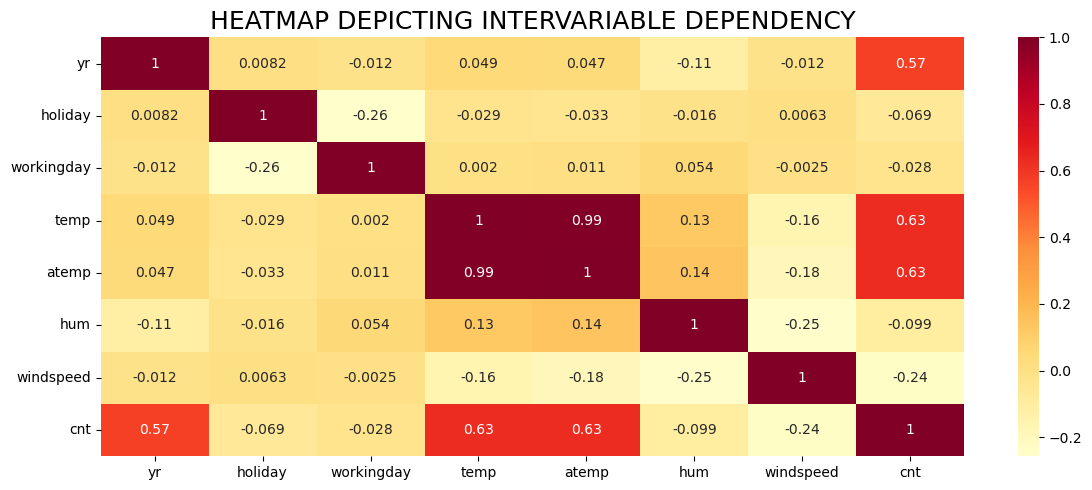

In [36]:
# Select only numeric columns
numeric_columns = boombikes_data.select_dtypes(include=[np.number]).columns

# plot figure size
plt.figure(figsize= (12,5))

#plotting the graph
sb.heatmap(boombikes_data[numeric_columns].corr(), annot= True, cmap= "YlOrRd" )

# Title
plt.title('heatmap depicting intervariable dependency'.upper(), fontsize= 18, y= 1)

# layout setting
plt.tight_layout()
plt.show()

Inference:
    
    * Extremely high correlation between temp and atemp observed.
    
    

## Section 4: Using Multiple linear regression for Model Building

In [37]:
# checeking for our dataset
boombikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear to Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear to Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear to Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


### Section 4.1: Creating the dummy variables

In [38]:
# creating the duplicate dataset
boombikes_data_copy= boombikes_data.copy()

In [39]:
boombikes_data_copy=pd.get_dummies(data=boombikes_data_copy, columns=['season','weekday','weathersit','mnth'],dtype= 'uint8', drop_first=True)

In [40]:
boombikes_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   yr                             730 non-null    int64  
 1   holiday                        730 non-null    int64  
 2   workingday                     730 non-null    int64  
 3   temp                           730 non-null    float64
 4   atemp                          730 non-null    float64
 5   hum                            730 non-null    float64
 6   windspeed                      730 non-null    float64
 7   cnt                            730 non-null    int64  
 8   season_Spring                  730 non-null    uint8  
 9   season_Summer                  730 non-null    uint8  
 10  season_Winter                  730 non-null    uint8  
 11  weekday_Mon                    730 non-null    uint8  
 12  weekday_Sat                    730 non-null    uin

In [41]:
#plotting the pairplot to see the relationship between the features
#sb.pairplot(boombikes_data_copy)
#plt.show()

In [42]:
boombikes_data_copy.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


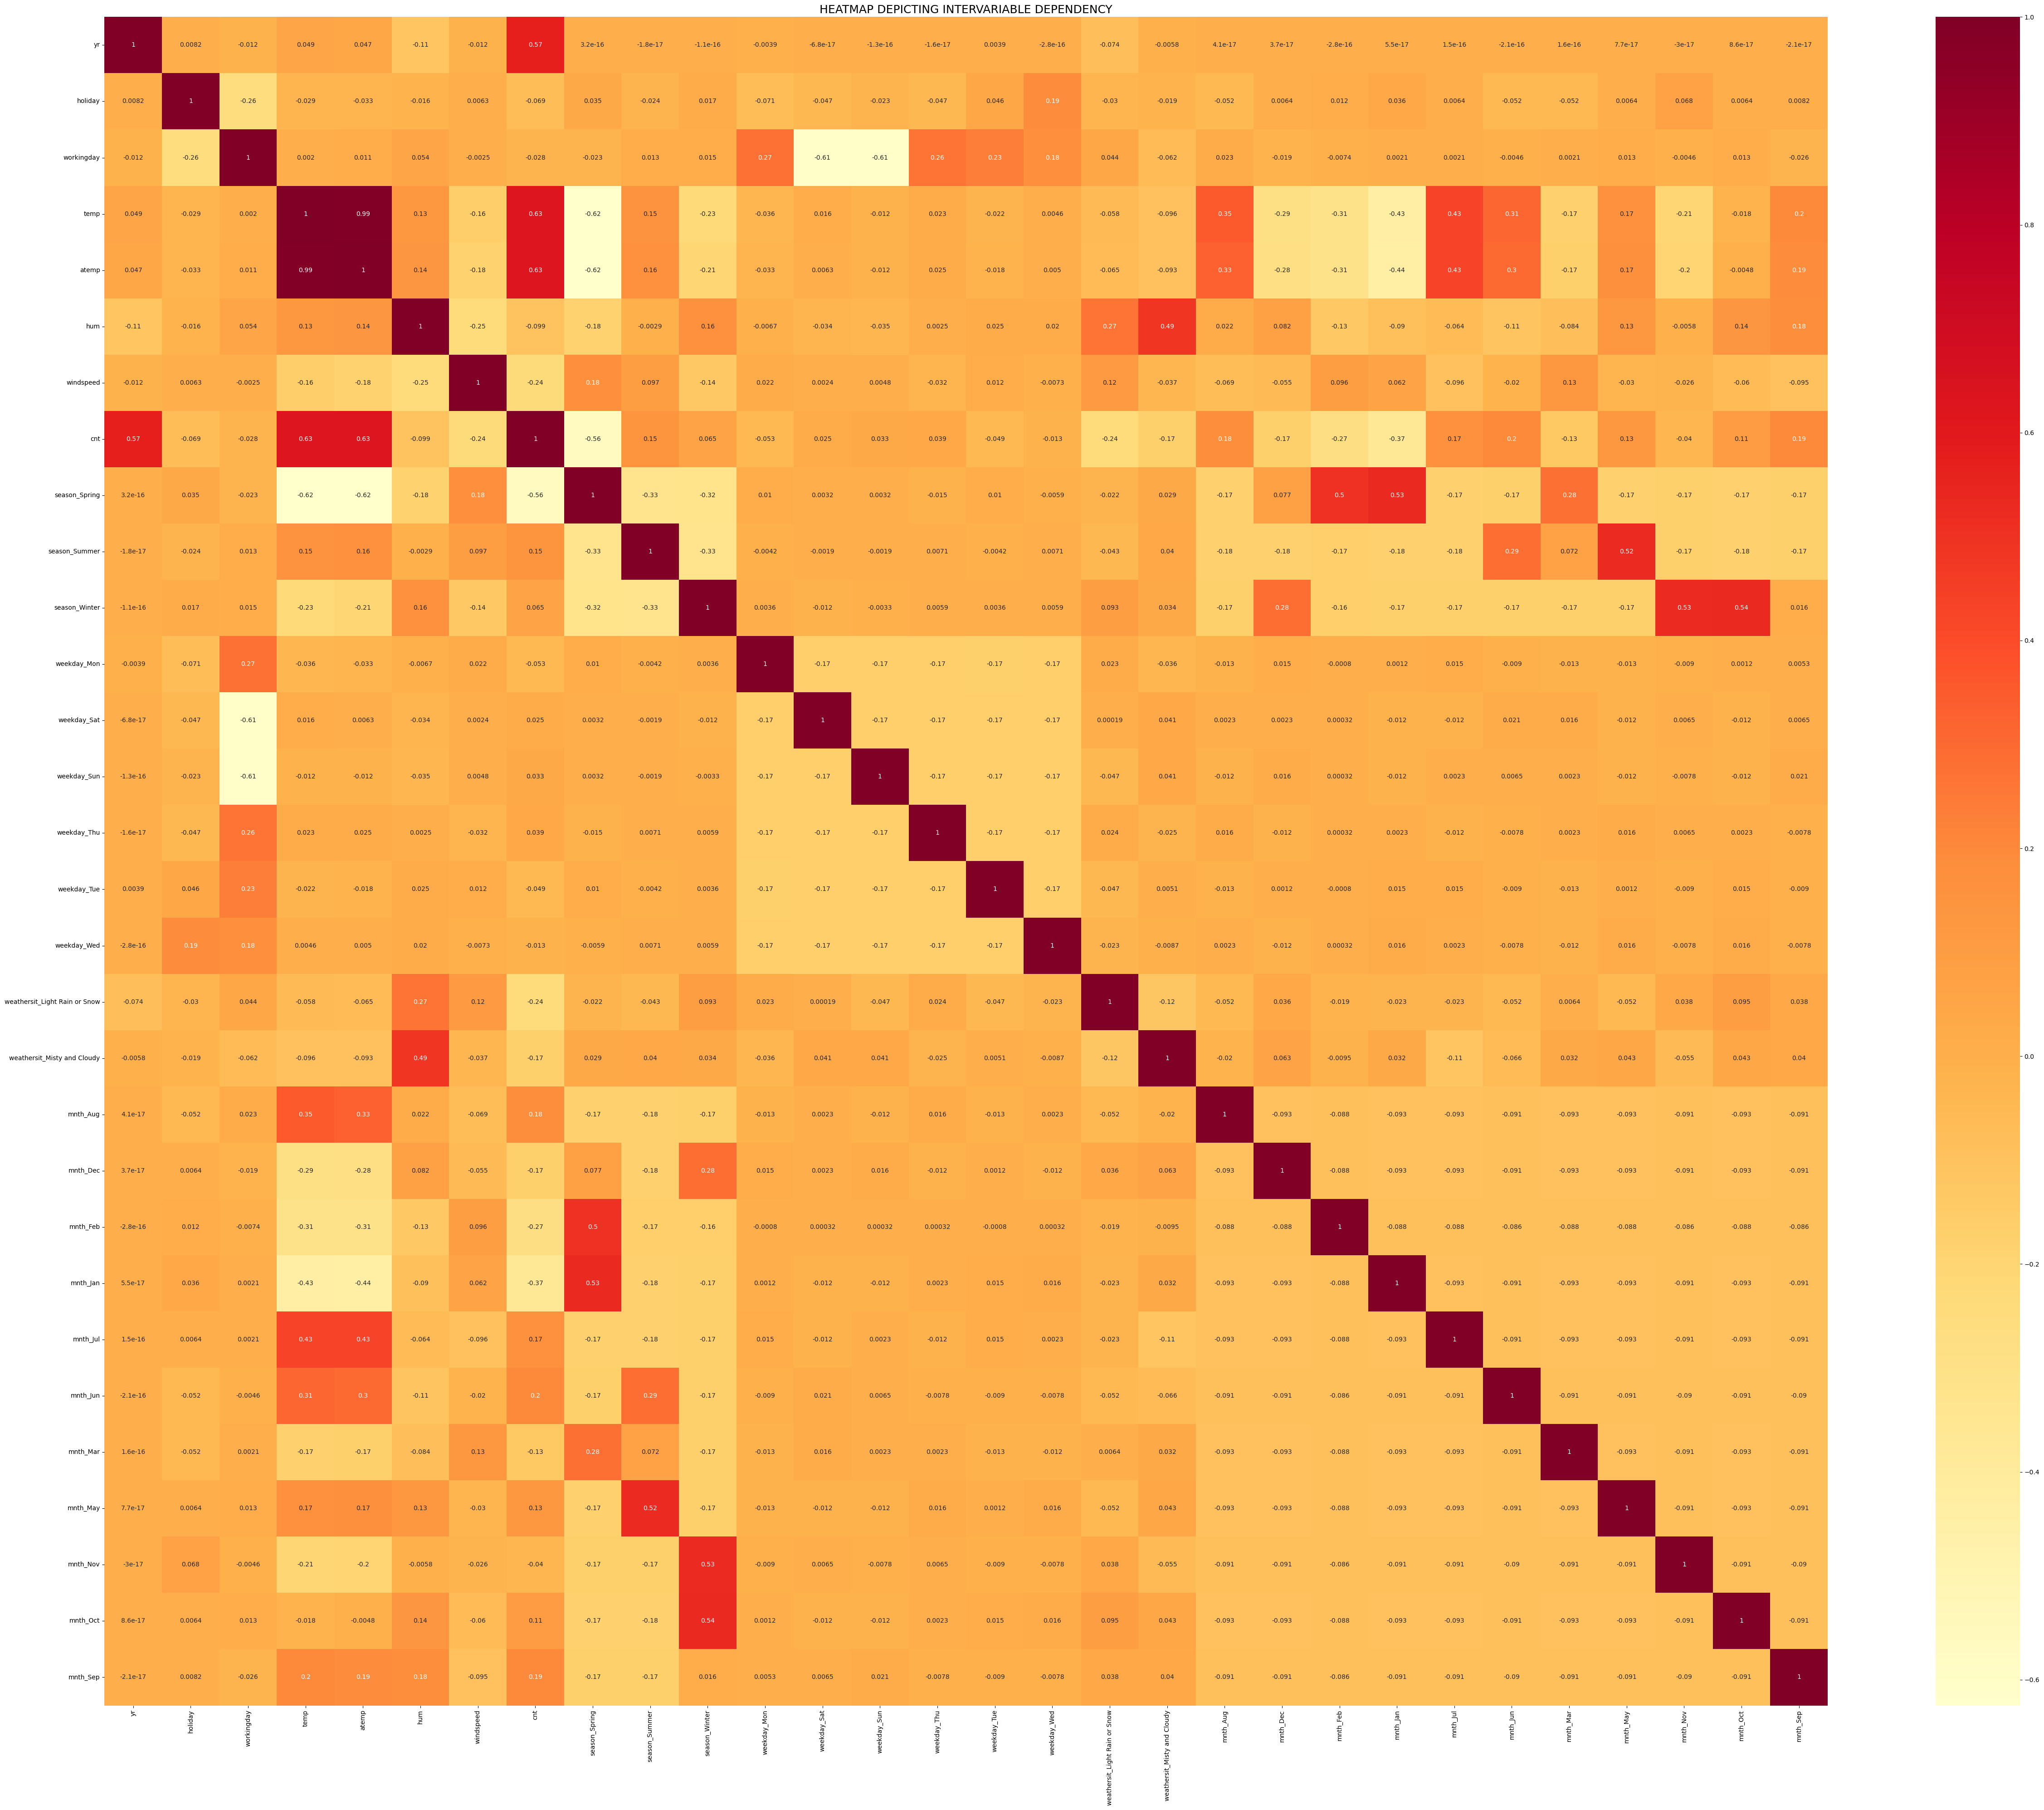

In [43]:
# Select only numeric columns
numeric_columns1 = boombikes_data_copy.select_dtypes(include=[np.number]).columns

# plot figure size
plt.figure(figsize= (50,40))

#plotting the graph
sb.heatmap(boombikes_data_copy[numeric_columns1].corr(), annot= True, cmap= "YlOrRd" )

# Title
plt.title('heatmap depicting intervariable dependency'.upper(), fontsize= 18, y= 1)

# layout setting
plt.tight_layout()
plt.show()

### Section 4.2: Train Test Split

In [44]:
bb_train, bb_test= train_test_split(boombikes_data_copy, test_size=0.30, train_size=0.70, random_state= 100)

In [45]:
print(f"Train data:{bb_train.shape}")
print(f"Test data : {bb_test.shape}")

Train data:(510, 30)
Test data : (219, 30)


Inference:
    
    * We have set 70% of data for data training and 30% of data for data testing.

In [46]:
# checking the sample of train data

bb_train.sample(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
465,1,0,1,14.296536,16.86370,46.9565,19.783358,4862,0,1,...,0,0,0,0,0,0,0,0,0,0
666,1,0,1,18.040000,21.97000,88.0000,23.999400,22,0,0,...,0,0,0,0,0,0,0,0,1,0
499,1,0,1,25.078347,28.82020,79.4583,9.875264,5115,0,1,...,0,0,0,0,0,0,1,0,0,0
39,0,0,1,5.526103,7.21415,49.4783,12.652213,1605,1,0,...,0,1,0,0,0,0,0,0,0,0
18,0,0,1,11.979134,14.92110,74.1739,13.957239,1650,1,0,...,0,0,1,0,0,0,0,0,0,0


### Section 4.3: Rescaling of data

### Applying Minmax Scaler to Normalise the data

In [47]:
# creating the scaler instance
scaler= MinMaxScaler()

In [48]:
# Initializing a list of feature names for scaling
scaler_list= [i for i in bb_train.columns if bb_train[i].nunique() >2]

# Scaling the variables and saving in our dataframe:
bb_train[scaler_list]= scaler.fit_transform(bb_train[scaler_list])

In [49]:
# Inspecting bb_train:
bb_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


###  Section 4.4: Splitting Training dataset in x and y

In [50]:
y_train= bb_train.pop('cnt')
X_train= bb_train

In [51]:
# Inspecting shapes of X_train and y_train
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

X_train shape: (510, 29), y_train shape: (510,)


Inference :
    
    * Data has been properly split in X_train and y_train with both having 510 rows,X_train having 29 columns and y_train             having 1 column.

In [52]:
# checking X_train 
X_train.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [53]:
# Checking y_train
y_train.head(2)

653    0.864243
576    0.827658
Name: cnt, dtype: float64

### Section 4.5: Model Development

### Section 4.5.1: Using Recursive Feature Elimination(RFE) for Automated selection of features

In [54]:
# Creating an instance of linearRegression model
lm= LinearRegression()

# Fitting model with X_train and y_train:
lm.fit(X_train, y_train)

# Creating RFE instance on fitted lm:
rfe= RFE(estimator=lm, n_features_to_select=15)

#Coverting rfe to fitted rfe
rfe= rfe.fit(X_train, y_train)

In [55]:
# Visual observation of result.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 11),
 ('weathersit_Light Rain or Snow', True, 1),
 ('weathersit_Misty and Cloudy', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1)]

Inference:
    
    * Above results show the suggestion given by RFE function to retain top 15 features.
    
    

### Using above results to extract 15 most index columns in train dataset

In [56]:
# Initializing another dataframe
temp_rfe_df= pd.DataFrame()

# Adding names of features:
temp_rfe_df['Col']= X_train.columns

# Adding rfe.support_ to dataframe 
temp_rfe_df['RFE_Support']= rfe.support_

# Retaining only the values that are recommended to be included in intial model
temp_rfe_df= temp_rfe_df[temp_rfe_df['RFE_Support']== True]

# Checking the dataframe
temp_rfe_df

,Col,RFE_Support
0,yr,True
1,holiday,True
3,temp,True
5,hum,True
6,windspeed,True
7,season_Spring,True
8,season_Summer,True
9,season_Winter,True
16,weathersit_Light Rain or Snow,True
17,weathersit_Misty and Cloudy,True


In [57]:
# Initializing a list of features that are to be included in intial model signalled by above dataframe
my_cols= [i for i in temp_rfe_df['Col']]

# Retaining features that are recommended in X_train 
X_train[my_cols].head()

,yr,holiday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0


In [58]:
print(f"Final dataframe for model training has {X_train[my_cols].shape[0]} rows and {X_train[my_cols].shape[1]} columns.")

Final dataframe for model training has 510 rows and 15 columns.


### Section 5.2: Model Development

### Section 5.2.1: Defining Functions

In [59]:
# Defining funuction for VIF table

def vif_table(dataframe):
    
    # Initialize a dataframe
    vif= pd.DataFrame()
    
    # Adding features
    vif['Feature']= dataframe.columns
    
    # Adding feature VIF values
    vif['VIF Value']= [round(variance_inflation_factor(dataframe.values, i),2) for i in range(len(dataframe.columns))]
    
    # Sorting dataframe
    vif= vif.sort_values(by= 'VIF Value',ascending= False)
    
    #Output
    return vif

In [60]:
# Defining function for Regression Statistics:

def regmodel_ols(y_dataframe,X_dataframe):
    
    # Adding constant - statsmodel needs a constant to be explicitly added
     X_dataframe= sm.add_constant(X_dataframe)
    
    # Creating linear Regression instance based on OLS and fitting the data and creatingsummary
     lm= sm.OLS(y_dataframe, X_dataframe).fit()
    
    # printing statistical summary
     print(lm.summary())

In [61]:
# checeking dataframe
X_train_1= X_train[my_cols]

### Section 5.2.2: Building Model

In [62]:
# Building Regression Model
regmodel_ols(y_train, X_train_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 29 Jun 2024   Prob (F-statistic):          3.34e-189
Time:                        18:25:49   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# Inference:
    
    * Above model shows R-Squared value of 0.845 (84.5% variance in target variable is explaiined by the given 15 variables)
    * Adjusted R-Squared is 0.841
    * P-value of all variables are within the acceptable threshold of 0.05 and hence dropping any variable will not be 
      logical.
    

In [63]:
# Inspecting VIF values
vif_table(X_train_1)

,Feature,VIF Value
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_Spring,4.37
7,season_Winter,4.06
6,season_Summer,2.81
9,weathersit_Misty and Cloudy,2.32
0,yr,2.09
13,mnth_Nov,1.83
11,mnth_Jan,1.75


In [64]:
# Dropping humidity columns as it is highly related to other variables 
X_train_2= X_train_1.drop(labels= 'hum', axis=1)

# Rebuilding Model
regmodel_ols(y_train,X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 29 Jun 2024   Prob (F-statistic):          1.57e-186
Time:                        18:25:49   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# Inference: 
    
    * R-Squared and Adjusted R-Squared values have shown substantial decline, however, our VIF values are probably within 
      limits making our model valid.
    

In [65]:
# Rechecking the VIF values
vif_table(X_train_2)

,Feature,VIF Value
2,temp,5.17
3,windspeed,4.67
6,season_Winter,2.94
4,season_Spring,2.89
5,season_Summer,2.23
0,yr,2.07
12,mnth_Nov,1.80
10,mnth_Jan,1.66
11,mnth_Jul,1.59
8,weathersit_Misty and Cloudy,1.56


# Inference:
    
    * Value of temp is still beyound the acceptable limits to accepts the model as valid.It shows high 
      collinearity making model invalid.

In [66]:
# Dropping the summer feature as it will not affect much to the R-Squared values as comapred with temp feature.
X_train_3= X_train_2.drop(labels='season_Summer', axis= 1)

# Rebuilding model
regmodel_ols(y_train, X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sat, 29 Jun 2024   Prob (F-statistic):          1.08e-186
Time:                        18:25:49   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# Inference:
    
    * Note the impact on R-Squared and Adjusted R-Squared scores is minimal.
    * p-value of feature 'mnth_Nov'is not within acceptable limits.

In [67]:
# Rechecking the VIF value
vif_table(X_train_3)

,Feature,VIF Value
2,temp,4.67
3,windspeed,4.05
5,season_Winter,2.54
4,season_Spring,2.36
0,yr,2.06
11,mnth_Nov,1.80
9,mnth_Jan,1.65
7,weathersit_Misty and Cloudy,1.53
8,mnth_Dec,1.46
10,mnth_Jul,1.36



# Inference:
    
    * All features are now within acceptable limits of VIF value.
    * We are still dropping the 'mnth_Nov' from our model because its p-value is not acceptable limits.

In [68]:
# Dropping 'mnth_Nov' column:
X_train_4= X_train_3.drop(labels='mnth_Nov',axis=1)

# Rebuildiing the model
regmodel_ols(y_train, X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sat, 29 Jun 2024   Prob (F-statistic):          2.02e-186
Time:                        18:25:49   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# Inference:
    
    * Slightly decrease in R-Squared and Adjusted R-Squared values.
    * All the P-values are under the threshold of 0.05.
    * Still dropping the 'mnth_Dec' for further fine tuning.

In [69]:
# Reachecking the VIF value
vif_table(X_train_4)

,Feature,VIF Value
2,temp,4.63
3,windspeed,4.00
4,season_Spring,2.36
0,yr,2.06
5,season_Winter,1.64
9,mnth_Jan,1.64
7,weathersit_Misty and Cloudy,1.53
10,mnth_Jul,1.36
8,mnth_Dec,1.29
11,mnth_Sep,1.20


In [70]:
# Dropping the "mnth_Dec" columns to  make the model simpler.
X_train_5= X_train_4.drop(labels='mnth_Dec',axis= 1)

# Rebuilding the model
regmodel_ols(y_train, X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sat, 29 Jun 2024   Prob (F-statistic):          1.13e-186
Time:                        18:25:49   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# Inference:
    
    * The impact on R-Sqaured and Adjusted R-Squared as been extremely minimal but the model has become sightly simpler with
      reduction of a variable.
    * Dropping 'mnth_Jan' feature.

In [71]:
# Dropping 'mnth_Jan' column
X_train_6= X_train_5.drop(labels='mnth_Jan', axis= 1)

# Rebuilding the model
regmodel_ols(y_train, X_train_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Sat, 29 Jun 2024   Prob (F-statistic):          1.16e-186
Time:                        18:25:49   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# Inference:
    
    * Slightly impact on R-Squared and Adjusted R-Squared was seen but model has become simpler with 10 features.

In [72]:
# Reinspecting the VIF values for final features:
vif_table(X_train_6)

,Feature,VIF Value
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,season_Spring,1.65
7,weathersit_Misty and Cloudy,1.51
5,season_Winter,1.40
8,mnth_Jul,1.35
9,mnth_Sep,1.20
6,weathersit_Light Rain or Snow,1.08
1,holiday,1.04


# Inference:
    
    * All VIF values are in proper limit thus fulfilling the assumption of multicollinearity and making our model valid.

### Section 5.3: Residual Analysis

### Section 5.3.1: Normal Distribution of Errors

In [73]:
lm= sm.OLS(y_train, X_train_6).fit()

# predicting the model
y_train_pred= lm.predict(X_train_6)

# assigning the residuals
residuals= y_train - y_train_pred

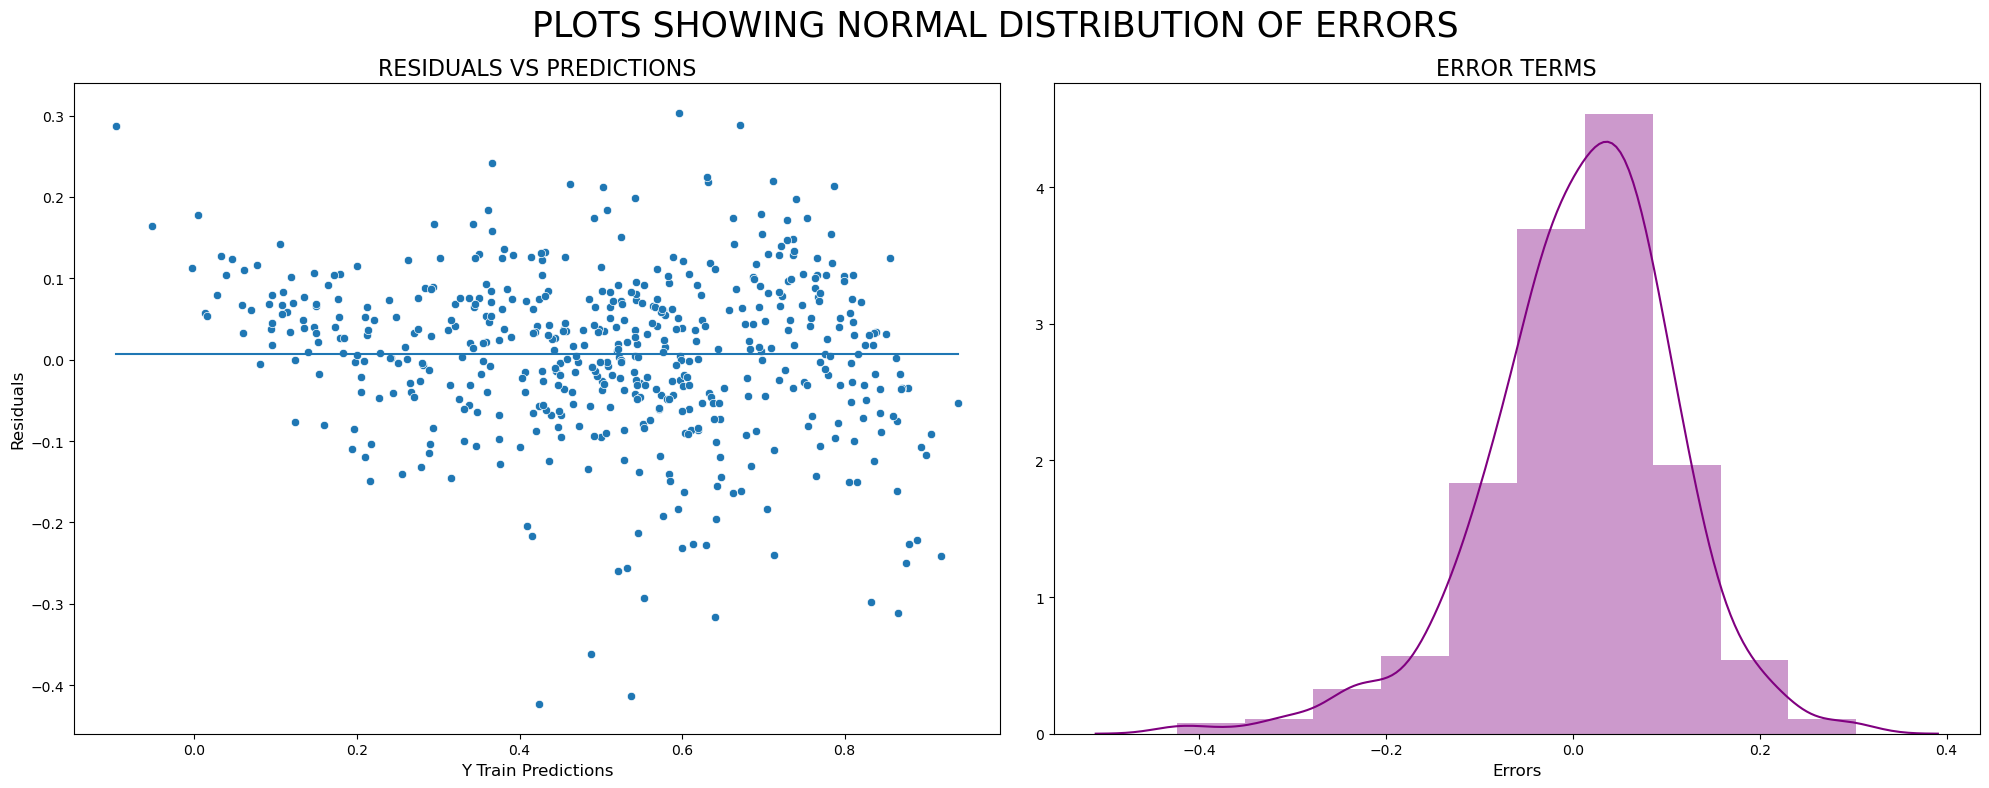

In [74]:
# Creating subplots:
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (20, 8))

# Main Title
plt.suptitle('plots showing normal distribution of errors'.upper(), fontsize= 25)

# First plot:
sb.scatterplot(y= residuals.values, x= y_train_pred.values, palette= "Purples", ax= ax[0])
sb.lineplot(y= residuals.mean(), x= y_train_pred.values, palette= "Purples", ax= ax[0])

# Title for x and y labels:
ax[0].set_title('residuals vs predictions'.upper(), fontsize= 16)
ax[0].set_xlabel('y train predictions'.title(), fontsize= 12)
ax[0].set_ylabel('residuals'.title(), fontsize= 12)


# Second plot:
sb.distplot(residuals, bins=10, color= "Purple", ax= ax[1])

# title for x and y labels for 2nd plot:
ax[1].set_title('error terms'.upper(), fontsize= 16)
ax[1].set_xlabel('errors'.title(), fontsize= 12)
ax[1].set_ylabel(' ')

# layout setting
plt.tight_layout()
plt.show()





# Inference:
    
    * Mean of the residuals is very close to 0 (Residual Mean : 0.0074)
    

In [75]:
residuals.mean()

0.007422882019328495

### Section 5.3.2: Testing  for Homoscedasticity

Text(0, 0.5, 'Y Train')

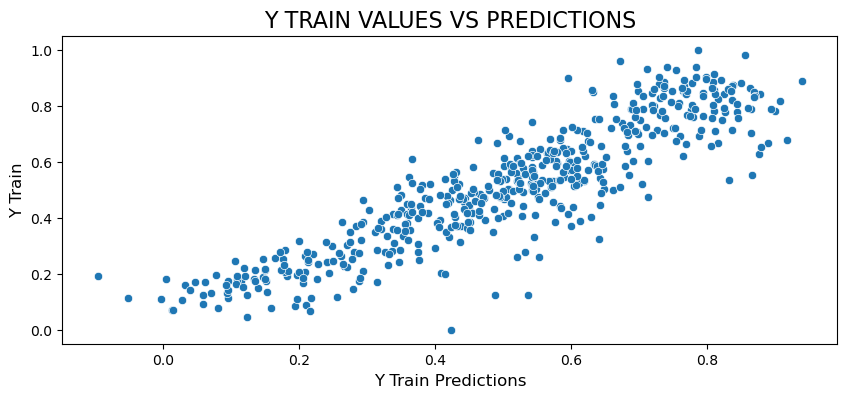

In [76]:
# plotting residuals against predicted values

# plot size

plt.figure(figsize= (10,4))

# plotting the residuals
sb.scatterplot(x= y_train_pred, y= y_train, palette= "Purples")

# title for x and y labels:
plt.title('y train values vs predictions'.upper(), fontsize= 16)
plt.xlabel('y train predictions'.title(), fontsize= 12)
plt.ylabel('y train'.title(), fontsize= 12)

# Inference:
    
    * The plot above shown an almost constant variance of predictions and thus the errors validating the assumption of                 Homoscedasticity.

### Section 5.3.3: Testing for correlation between Error Terms

Text(0, 0.5, 'Y Train')

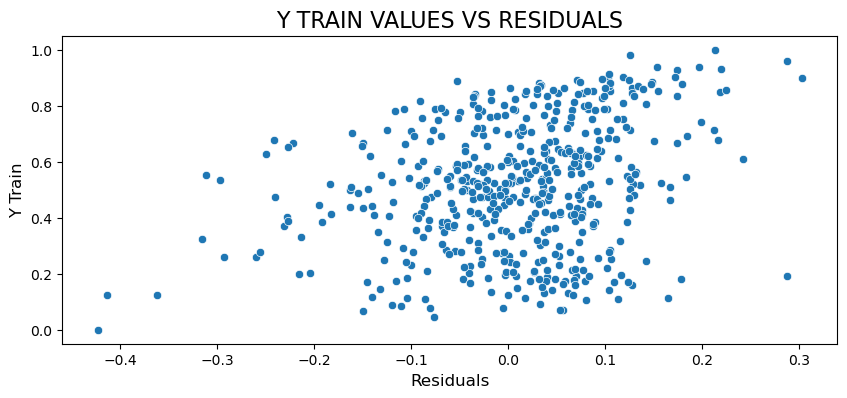

In [77]:
#plot size

plt.figure(figsize= (10,4))

# plotting the residuals
sb.scatterplot(x= residuals, y= y_train, palette= "Purples")

# title for x and y labels:
plt.title('y train values vs Residuals'.upper(), fontsize= 16)
plt.xlabel('Residuals'.title(), fontsize= 12)
plt.ylabel('y train'.title(), fontsize= 12)

## Section 5.4 : Making Predictions

### Section 5.4.1: Appplying Scaling on Test Data

In [78]:
# checking test data before scaling:
bb_test.sample(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
396,1,0,1,19.235847,23.32690,50.7917,12.667489,4579,1,0,...,0,1,0,0,0,0,0,0,0,0
325,0,0,1,17.083347,21.08480,96.2500,7.959064,1607,0,0,...,0,0,0,0,0,0,0,1,0,0
193,0,0,1,30.613347,34.47020,63.1667,9.790911,4342,0,0,...,0,0,0,1,0,0,0,0,0,0
629,1,0,0,26.650000,30.52440,64.6667,19.000061,8395,0,0,...,0,0,0,0,0,0,0,0,0,1
423,1,0,1,14.725847,17.67625,39.5833,12.958939,4363,1,0,...,0,1,0,0,0,0,0,0,0,0


In [79]:
# Scaling the variable and scaling in our dataframe:
bb_test[scaler_list]= scaler.transform(bb_test[scaler_list])

# Note:
    
    * Scaler is already fitted in the train data set, hence, in this step we did not use fit() or fit_transform() and used 
      just transform() method.

In [80]:
# checking test data after scaling:
bb_test.sample(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
218,0,0,1,0.851512,0.835128,0.775870,0.342212,0.432927,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,1,0.204785,0.204058,0.635765,0.188090,0.225840,1,0,...,0,0,1,0,0,0,0,0,0,0
676,1,0,1,0.365147,0.344989,0.343644,0.656831,0.608951,0,0,...,0,0,0,0,0,0,0,1,0,0
124,0,0,0,0.498465,0.476286,0.457707,0.544089,0.507478,0,1,...,0,0,0,0,0,0,1,0,0,0
272,0,0,0,0.629300,0.611372,0.667239,0.352935,0.595950,0,0,...,0,0,0,0,0,0,0,0,0,1


### Section 5.4.2: Partioning the data into X_test and y_test:

In [81]:
y_test= bb_test.pop('cnt')
X_test= bb_test

In [82]:
# checking X_test
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [83]:
print(f"X_test shape is : {X_test.shape}")
print(f'y_test shape is : {y_test.shape}')

X_test shape is : (219, 29)
y_test shape is : (219,)


### Section 5.4.3: Making Actual Predictions

In [84]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new= X_test[X_train_6.columns]

In [85]:
# making prediction
y_test_pred= lm.predict(X_test_new)

## Section 5.5 : Evaluating the prediction

Text(0, 0.5, 'predicted y test values')

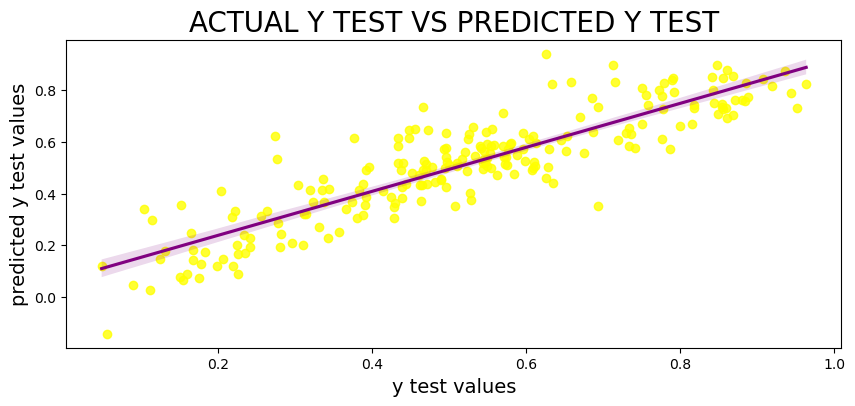

In [88]:
# plotting y_test and y_test_pred to understand the spread of data.
fig = plt.figure(figsize= (10,4))

# plotting :
sb.regplot(x= y_test, y= y_test_pred, scatter_kws={'color' : 'yellow'}, line_kws = {'color' : 'purple'})

# setting the titles:
plt.title('actual y test vs predicted y test'.upper(), fontsize = 20)
plt.xlabel('y test values', fontsize = 14)
plt.ylabel('predicted y test values', fontsize = 14)

# Inference :
    
    * Y Test values and Y Test predicted values have shown a strong visual semblence and hence our predicted are evaluated 
      as a healthy fit. We do have presence of outliers, however, on a broader scale, most of the points display a healthy 
      fit by following a trend.

## Section 5.6: Assessing the Model Quality And Generalization Ability

In [89]:
print('R2 score of test data predictions:', round(r2_score(y_pred= y_test_pred, y_true= y_test),5))
print('R2 score of train data predictions:', round(r2_score(y_pred= y_train_pred, y_true= y_train),5))
print("Absolute difference between R2 scores of test and train dataset predictions:",
     abs(round(r2_score(y_pred = y_test_pred, y_true= y_test)- r2_score(y_pred= y_train_pred, y_true= y_train),5)))

R2 score of test data predictions: 0.77336
R2 score of train data predictions: 0.79572
Absolute difference between R2 scores of test and train dataset predictions: 0.02236


Since variation between train data prediction and test data prediction r2_score is less than 5%, model is proven to be 
dependable enough to be generalized.

## Section 5.7 : Equation for prediction

In [90]:
# creating the constant variable
const = 0.2519  # This information is taken from X_train_6 ols model above

# parameter series:
parameter_series= pd.Series(lm.params)
print(parameter_series)

yr                               0.241590
holiday                         -0.093583
temp                             0.731492
windspeed                       -0.024157
season_Spring                    0.003763
season_Winter                    0.128820
weathersit_Light Rain or Snow   -0.277787
weathersit_Misty and Cloudy     -0.060905
mnth_Jul                        -0.100802
mnth_Sep                         0.055007
dtype: float64


In [91]:
# creating the equation:
print(f"Demand = {round(const,3)}")
for i in range(len(parameter_series)):
    if i != len(parameter_series)-1:
        print(f"\t{parameter_series.index[i]} x {round(parameter_series.values[i],3)} + ")
        
    else:
        print(f"\t{parameter_series.index[i]} x {round(parameter_series.values[i],3)}")
        

Demand = 0.252
	yr x 0.242 + 
	holiday x -0.094 + 
	temp x 0.731 + 
	windspeed x -0.024 + 
	season_Spring x 0.004 + 
	season_Winter x 0.129 + 
	weathersit_Light Rain or Snow x -0.278 + 
	weathersit_Misty and Cloudy x -0.061 + 
	mnth_Jul x -0.101 + 
	mnth_Sep x 0.055


## Section 6: Business Recommendations

### As per model following results has been seen

1. Year (yr):- A coefficient value of yr indicated that a year wise the rental numbers are increasing.

2. Temperature (temp):-  A coefficient value of temp indicates that temperature has significant impact on bike bookings and it is an imp parameter for building a model.

3. Light rain or  snow :-  A coefficient value of Light snow indicates there will we the decrease in bike bookings if there is any rain or snowfall or due to bad weather condition.